<a href="https://colab.research.google.com/github/hyeonjun/Python_ML_Pandas_Data_Analytics/blob/main/Part_4_Visualization_Tools/Visualization_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 드라이브에 있는 csv파일 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Matplotlib - 기본 그래프 도구

* 선 그래프



In [2]:
import pandas as pd
# 데이터 시각화에 사용할 matplotlib.pyplot 모듈
%matplotlib inline 
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel("경로/시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)

In [3]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/shar

In [4]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [6]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/na

In [7]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐을 방지

NanumBarunGothic


In [8]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


'전출지별' 열에는 누락 데이터가 다수 들어있다. 누락 데이터는 Excel 파일에서 병합된 셀을 데이터 프레임으로 변환할 때 적절한 값을 찾지 못해서 발생한 것이다.

fillna() 메소드의 method='ffill' 옵션을 사용하면 누락 데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채운다.

In [9]:
# 누락값 앞 데이터로 채우기
df = df.fillna(method='ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


'전출지별' 열에서 '서울특별시'라는 값을 갖는 데이터만 추출하여 변수 df_seoul에 저장한다. 서울에서 다른 지역으로 전출(이동)하는 데이터만 남는다.

In [10]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


'전입지별' 열의 이름을 '전입지'로 바꾸고, '전입지' 열을 df_seoul의 행 인덱스로 지정한다. 이제 전입지를 기준으로 데이터를 선택할 수 있다.

In [11]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


df_seoul에서 '전입지'가 '경기도'인 행 데이터를 선택하여 sr_one에 저장한다.

서울에서 경기도로 이동한 인구 데이터를 나타낸다.

In [12]:
sr_one = df_seoul.loc['경기도']
sr_one[:5]

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

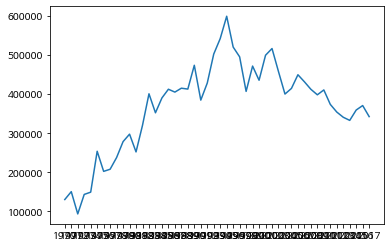

In [13]:
plt.plot(sr_one.index, sr_one.values)

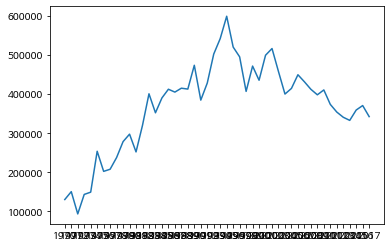

In [14]:
plt.plot(sr_one)

그래프 객체에 차트 제목을 추가할 때는 title() 함수를 사용한다.

x 축 이름은 xlabel(), y축은 ylabel() 을 활용한다.

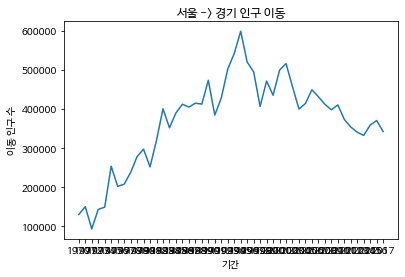

In [15]:
plt.plot(sr_one)
# 차트 제목
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구 수')

plt.show() # 변경사항을 저장하고 그래프 출력


x 축 눈금 라벨의 클씨가 서로 겹쳐서 잘 보이지 않는 문제를 해결해보자.

이것은 눈금 라벨이 들어갈만한 충분한 여유 공간이 없어서 발생하는 문제다.

1. 공간을 만들기 위해 figure() 함수로 그림틀의 가로 사이즈를 더 크게 설정한다.

2. xticks() 함수를 활용하여 x축 눈금 라벨을 반시계 방향으로 90도 회전하여 글씨가 겹치지 않도록 한다.

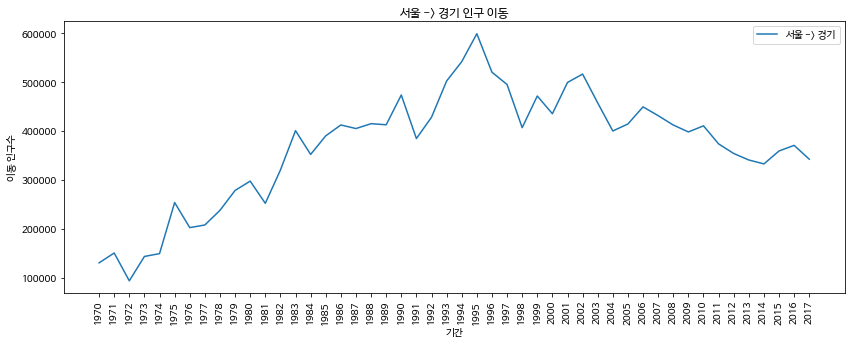

In [20]:
plt.figure(figsize=(14, 5)) # 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.xticks(rotation='vertical') # x 축 눈금 라벨 회전. vertical 대신에 90을 넣어도 된다.
plt.plot(sr_one)
plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

Matplotlib의 스타일 서식 지정에 대해 알아보자. 색, 폰트 등 디자인적 요소를 사전에 지정된 스타일로 빠르게 일괄 변경한다. 단, 스타일 서식을 지정하는 것은 Matplotlib 실행 환경 설정을 변경하는 것이므로 다른 파일을 실행할 때도 계속 적용된다는 점을 유의하자.

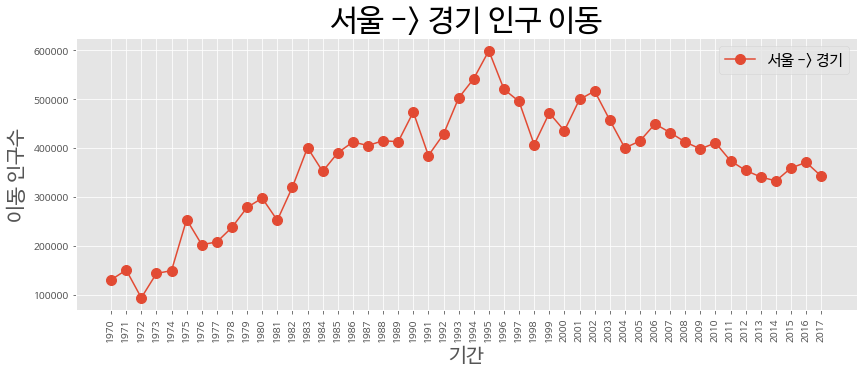

In [21]:
plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14, 5)) # 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.xticks(size=10, rotation='vertical') # size=10 옵션을 추가하여 폰트 크기를 10으로  설정, x 축 눈금 라벨 회전.
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가
plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

plt.show()

스타일의 종류 : 'classic','bmh','dark_background','fast','grayscale','seaborn' 등이 있다.

In [22]:
# 스타일 리스트 출력
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

그래프에 대한 설명을 덧붙이는 주석에 대해 알아보자.

annotate() 함수를 사용. 주석 내용(텍스트)을 넣을 위치와 정렬 방법 등을 annotate() 함수에 함께 전달한다.

arrowprops 옵션을 사용하면 텍스트 대신 화살표가 표시된다. 화살표 스타일, 시작점과 끝점의 좌표를 입력.

주석을 넣을 여백 공간 확보를 위해 ylim() 함수를 사용하여 y축 범위를 먼저 늘리고, annotate() 함수 사용, 위치를 나타내는 (x,y) 좌료에서 x값은 인덱스 번호 사용. y좌표값에 들어갈 인구 수 데이터는 숫자값이므로 그대로 사용.

annotate() 함수의 rotation욥션에서 양의 회전 방향은 반시계방향이다. 글자를 위아래 세로 방향으로 정렬하는 va 옵션은 'center','top',bottom',baseline'이 있다. 좌우 가로 방향으로 정렬하는 ha 옵션에는 'center', 'left', 'right'가 있다.

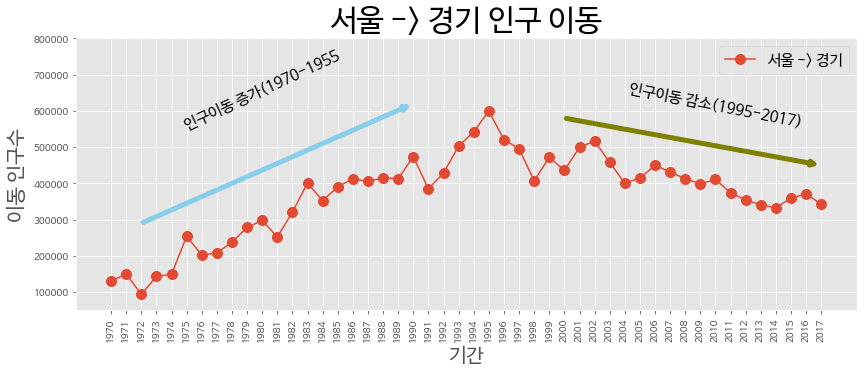

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation=90)
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000), # 화살표의 머리 부분(끝점)
             xytext=(2, 290000), # 화살표의 꼬리 부분(시작점)
             xycoords='data', # 좌표 체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), # 화살표 서식
             )

plt.annotate('',
             xy=(47,450000),
             xytext=(30, 580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5)
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1955',
             xy=(10, 550000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize=15
             )

plt.annotate('인구이동 감소(1995-2017)',
             xy=(40, 560000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15,
             )

plt.show()